In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
import nlds.delayembed as de
from scipy import io, signal
import pyEDM as edm
import pandas as pd

In [2]:
# .mat's are ~ 80, 330, and 300 mb respectively
datafolder = '/Users/rdgao/Documents/data/Stringer_neuropixel/spikes/'
krebs = io.loadmat(datafolder+'spks/spksKrebs_Feb18.mat', squeeze_me = True)
# robbins = io.loadmat(datafolder+'spks/spksRobbins_Feb18.mat', squeeze_me = True)  
# waksman = io.loadmat(datafolder+'spks/spksWaksman_Feb18.mat', squeeze_me = True)

In [4]:
probelocs = io.loadmat(datafolder+'probeLocations.mat', squeeze_me = True)
probelocs

{'__function_workspace__': array([[ 0,  1, 73, ...,  0,  0,  0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Mar 12 09:30:58 2019',
 '__version__': '1.0',
 'probeLocations': array([(array([('ZO', 69, 150, 4, array([ 1.3, -1.5]), array([414.96569197, 422.8669436 , 135.93728682]), array([0.31035575, 0.17918397, 0.93358043]), MatlabOpaque([(b'', b'MCOS', b'table', array([3707764736,          2,          1,          1,          1,
                 1], dtype=uint32))],
              dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]), array([[5335.92299283, 4944.32170599, 4926.26217853],
        [5319.92299283, 4944.32170599, 4953.97499145],
        [5321.71587787, 4925.65009746, 4936.5349055 ],
        ...,
        [4140.57114964, 1396.7160853 , 4273.07588732],
        [4142.36403468, 1378.04447677, 4255.63580136],
        [4126.36403468, 1378.04447677, 4283.34861428]]), array(['BST', 'BST', 'BST', 'BST', 'BST', 'BST'

In [10]:
#returns a length 8 array containing dictionaries {Cluster_n: Time_n}

def make_spike_array(data):
    main_spike_array = np.array([]) #has 8 dictionaries

    for i in np.arange(len(data['spks'])):
        spikes = data['spks'][i][0]
        clusters = data['spks'][i][1]
        #spike_to_cluster = np.vstack((spikes, clusters)).T

        cluster_ids = list(set(clusters)) #1-305
        neuron_times = {k: [np.sort(spikes[clusters==k])] for k in cluster_ids}


#         neuron_times = {k: [] for k in cluster_ids}

#         for i in cluster_ids:
#             neuron_times[i] = np.sort(spikes[clusters==i])

        main_spike_array = np.append(main_spike_array, neuron_times)   
        
    return main_spike_array

In [25]:
#returns a length 8 array containing dictionaries {Cluster_n: Time_n}

def make_spike_array(data):
    main_spike_array = np.array([])
    for i in np.arange(len(data['spks'])):
        spikes = data['spks'][i][0]
        clusters = data['spks'][i][1]

        cluster_ids = list(set(clusters))
        neuron_times = {k: np.sort(spikes[clusters==k]) for k in cluster_ids}
        main_spike_array = np.append(main_spike_array, neuron_times)   
        
    return main_spike_array

In [34]:
krebs_spks = make_spike_array(krebs)


4999


../nlds/delayembed.py:192: RuntimeWarning: divide by zero encountered in true_divide
  del_R[:, dim] = abs(ndist) / dist[:, 1]
../nlds/delayembed.py:192: RuntimeWarning: invalid value encountered in true_divide
  del_R[:, dim] = abs(ndist) / dist[:, 1]
../nlds/delayembed.py:192: RuntimeWarning: divide by zero encountered in true_divide
  del_R[:, dim] = abs(ndist) / dist[:, 1]
../nlds/delayembed.py:192: RuntimeWarning: invalid value encountered in true_divide
  del_R[:, dim] = abs(ndist) / dist[:, 1]
../nlds/delayembed.py:230: RuntimeWarning: invalid value encountered in greater
  crit_1 = del_R[:, dim] > R_thr


-1


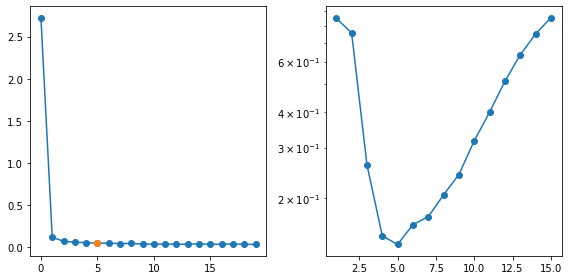

In [127]:
isi = np.log10(np.diff(krebs_spks[4][1][:5000]))
print(len(isi))
max_dim = 15
n_bins = 20
max_tau = 20

t_MI, MI = de.compute_delay_MI(isi, n_bins, max_tau)
v_ind, v_val = de.find_valley(MI)
embed_dim, pfnn = de.PFNN(isi, 1, max_dim)

print(embed_dim)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(t_MI, MI, 'o-')
plt.plot(v_ind, v_val, 'o')
plt.subplot(1,2,2)
plt.plot(range(1,max_dim+1), pfnn, 'o-')
plt.yscale('log')
plt.tight_layout()

4999


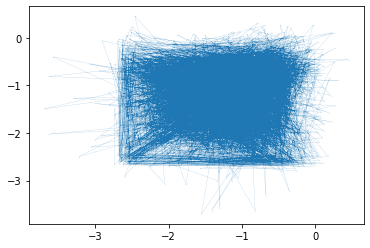

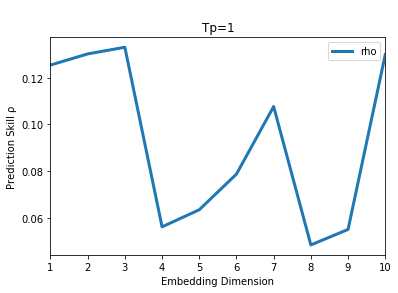

,E,rho
0,1.0,0.125428
1,2.0,0.130195
2,3.0,0.133058
3,4.0,0.056094
4,5.0,0.063413
5,6.0,0.078699
6,7.0,0.107645
7,8.0,0.048348
8,9.0,0.054977
9,10.0,0.129850


In [119]:
delay = 5
isi = np.log10(np.diff(krebs_spks[2][3][:5000]))
plt.plot(isi[:-delay], isi[delay:], '.-', ms=0.1, lw=0.1)
print(len(isi))
df_isi = pd.DataFrame(np.array([np.arange(1, len(isi)+1).astype(int), isi]).T, columns=['Time','ISI'])
#df_isi
edm.EmbedDimension(dataFrame = df_isi, lib = "1 2000", pred = "2000 2500", columns="ISI", target="ISI", tau=delay)

EmbedDimension( dataFrame = sampleData["TentMap"], lib = "1 100", pred = "201 500", columns = "TentMap", target = "TentMap") 



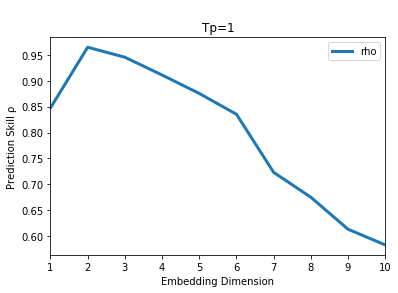

PredictInterval( dataFrame = sampleData["TentMap"], lib = "1 100", pred = "201 500", E = 2, columns = "TentMap", target = "TentMap") 



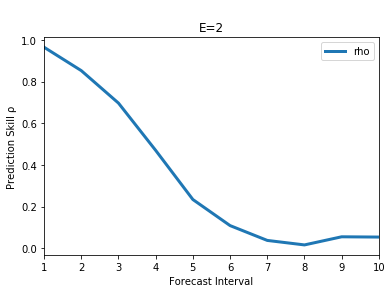

PredictNonlinear( dataFrame = sampleData["TentMapNoise"], lib = "1 100", pred = "201 500", E = 2, columns = "TentMap", target = "TentMap" ) 



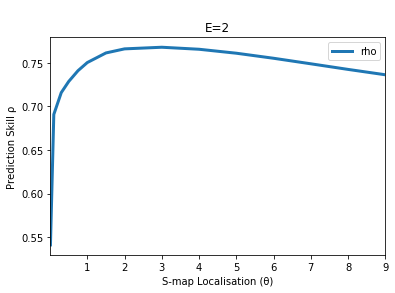

Simplex( dataFrame = sampleData["block_3sp"], lib = "1 99", pred = "100 195",  E = 3, embedded = True, showPlot = True, const_pred = True, columns="x_t y_t z_t", target="x_t") 



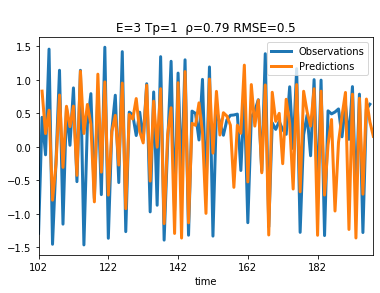

Simplex( dataFrame = sampleData["block_3sp"], lib = "1 99", pred = "105 190",  E = 3, showPlot = True, const_pred = True, columns = "x_t", target = "x_t") 



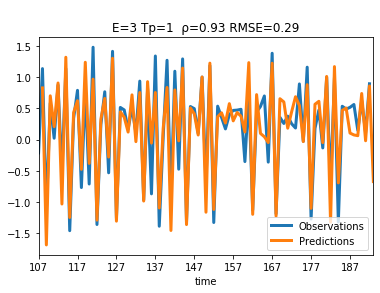

Multiview( dataFrame = sampleData["block_3sp"], lib = "1 99", pred = "105 190",  E = 3, columns = "x_t y_t z_t", target = "x_t", showPlot = True) 



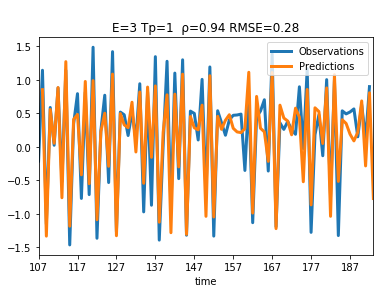

SMap( dataFrame = sampleData["circle"], lib = "1 100", pred = "110 190", theta = 4, E = 2, verbose = True, showPlot = True, embedded = True, columns = "x y", target = "x") 



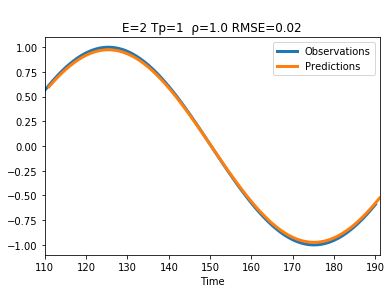

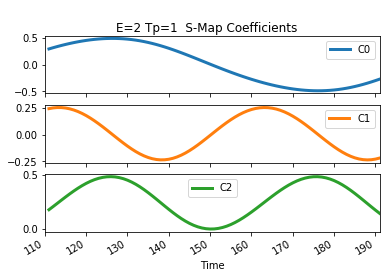

CCM( dataFrame = sampleData["sardine_anchovy_sst"], E = 3, Tp = 0, columns = "anchovy", target = "np_sst", libSizes = "10 70 10", sample = 100, verbose = True,  showPlot = True) 



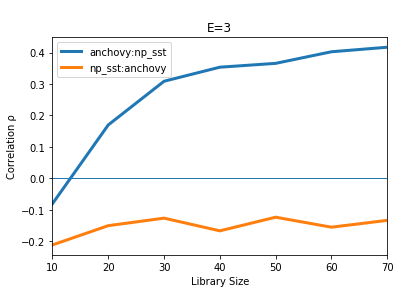

In [79]:
edm.Examples()
#edm.sampleData['TentMap']

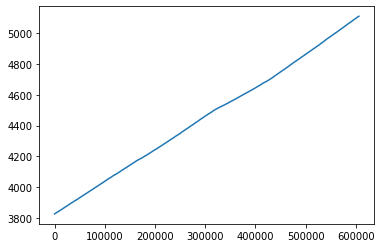

In [144]:
plt.plot(np.sort(krebs['spks'][0][0]))
spks = np.sort(krebs['spks'][0][0])
binned = np.digitize(spks,np.arange(3800,5200,0.001))

In [190]:
binned, t_bin = np.histogram(spks,np.arange(3800,5200,0.005))
binned=binned+1e-3

(4000, 4005)

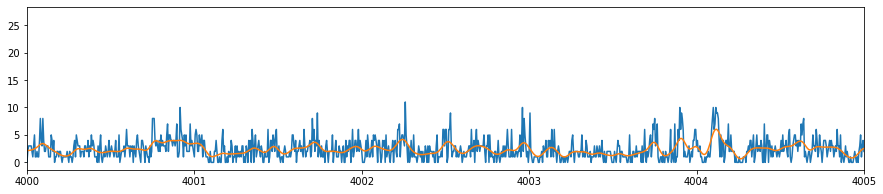

In [191]:
win = signal.windows.gaussian(40,5)
win/=win.sum()
#plt.plot(win)
binned_smoothed = np.convolve(binned,win, mode='same')
plt.figure(figsize=(15,3))
plt.plot(t_bin[:-1], binned)
plt.plot(t_bin[:-1], binned_smoothed)
plt.xlim([4000,4005])

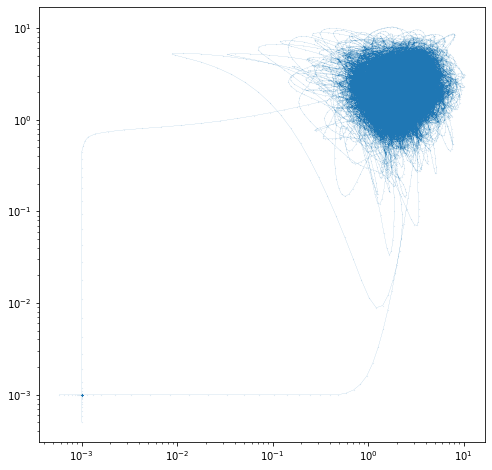

In [197]:
plt.figure(figsize=(8,8))
delay=20
plt.loglog(binned_smoothed[delay:],binned_smoothed[:-delay], '.-', ms=0.1, lw=0.1)
#plt.plot(binned[delay:],binned[:-delay], '.-', ms=0.1, lw=0.1)

../nlds/delayembed.py:192: RuntimeWarning: divide by zero encountered in true_divide
  del_R[:, dim] = abs(ndist) / dist[:, 1]
../nlds/delayembed.py:192: RuntimeWarning: invalid value encountered in true_divide
  del_R[:, dim] = abs(ndist) / dist[:, 1]
../nlds/delayembed.py:192: RuntimeWarning: divide by zero encountered in true_divide
  del_R[:, dim] = abs(ndist) / dist[:, 1]
../nlds/delayembed.py:192: RuntimeWarning: invalid value encountered in true_divide
  del_R[:, dim] = abs(ndist) / dist[:, 1]
../nlds/delayembed.py:192: RuntimeWarning: divide by zero encountered in true_divide
  del_R[:, dim] = abs(ndist) / dist[:, 1]
../nlds/delayembed.py:192: RuntimeWarning: invalid value encountered in true_divide
  del_R[:, dim] = abs(ndist) / dist[:, 1]
../nlds/delayembed.py:192: RuntimeWarning: divide by zero encountered in true_divide
  del_R[:, dim] = abs(ndist) / dist[:, 1]
../nlds/delayembed.py:192: RuntimeWarning: invalid value encountered in true_divide
  del_R[:, dim] = abs(ndist) /

7


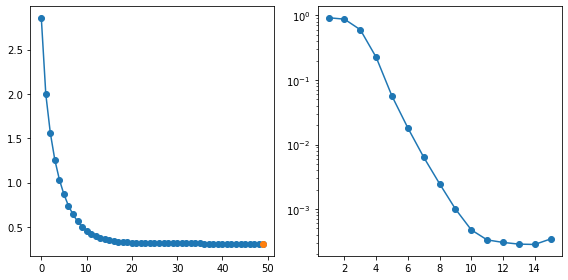

In [ ]:
data = binned_smoothed
max_dim = 15
n_bins = 50
max_tau = 50

t_MI, MI = de.compute_delay_MI(data, n_bins, max_tau)
v_ind, v_val = de.find_valley(MI)
embed_dim, pfnn = de.PFNN(data, v_ind, max_dim)

print(embed_dim)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(t_MI, MI, 'o-')
plt.plot(v_ind, v_val, 'o')
plt.subplot(1,2,2)
plt.plot(range(1,max_dim+1), pfnn, 'o-')
plt.yscale('log')
plt.tight_layout()